In [11]:
# Specify the name that is used to seach for the data
place_name = "Ступино, Московская область, RU"

In [2]:
!pip install osmnx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 132.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 89.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [12]:
# import osmnx
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

In [49]:
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 57.9 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/google/colab/_pip.py:83: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.9/dist-packages/contextily-1.3.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.9/dist-packages/google/colab/_pip.py:83: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.9/dist-packages/mercantile-1.2.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.9/dist-packages/google/colab/_pip.py:83: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.9/dist-packages/rasterio-1.3.6.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.9/dist-packages/google/colab/_pip.py:83: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.9/dist-packages/snuggs-1.4.7.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  fo

In [50]:
import contextily as cx

In [13]:
# Check the data type
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((37.98761 54.94530, 37.98814 54.94432...",54.947919,54.840718,38.199155,37.987605,115321129,way,37094231,54.886598,38.077259,"Stupino, City district Stupino, Moscow Oblast,...",place,town,0.597641


<Axes: >

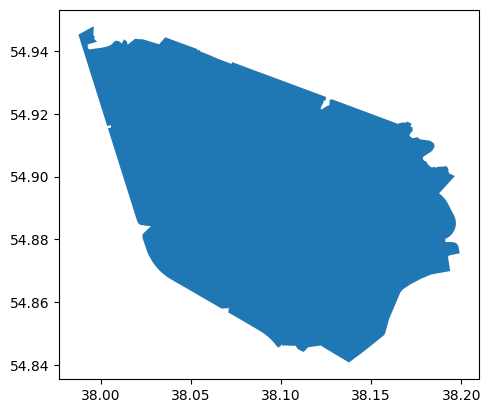

In [14]:
area.plot()

<Axes: >

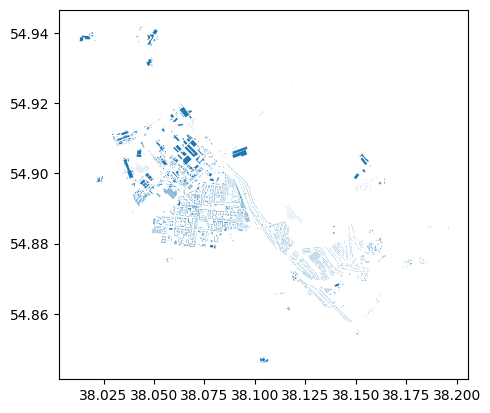

In [16]:
# Plot footprints 
buildings.plot()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


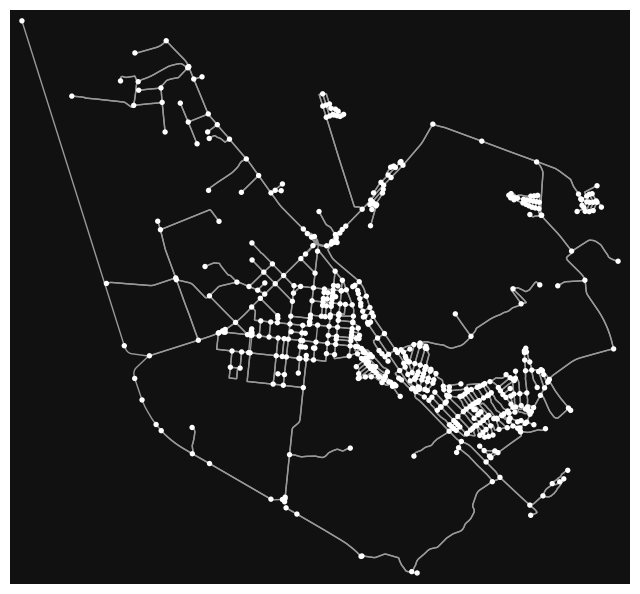

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [31]:
drive = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(drive)

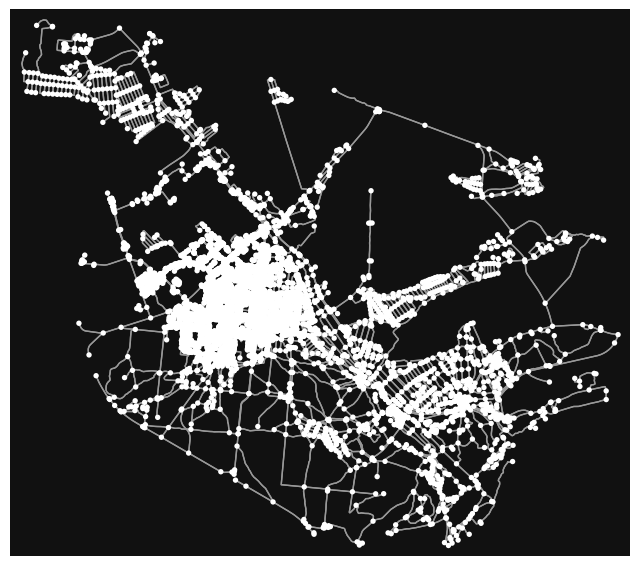

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [42]:
walk = ox.graph_from_place(place_name, network_type='walk')
ox.plot_graph(walk)

In [44]:
# List key-value pairs for tags
tags = {'amenity': True, 'landuse': ['reatail', 'commercial']}   

items = ox.geometries_from_place(place_name, tags)
items

amenity  \
element_type osmid                         
node         446218402              fuel   
             446266808          car_wash   
             446779653              taxi   
             446903926        restaurant   
             447021116        restaurant   
...                                  ...   
relation     7146337             parking   
             10294944   place_of_worship   
             10294945   place_of_worship   
             10294946   place_of_worship   
             10294947          monastery   

                                                              name  \
element_type osmid                                                   
node         446218402                                  BP Ступино   
             446266808                                         NaN   
             446779653                                         NaN   
             446903926                                        Очаг   
             447021116                                у Сальвадора   
...                                                            ...   
relation     7146337                                           NaN   
             10294944                   Церковь Николая Чудотворца   
             10294945   Церковь Усекновения Головы Иоанна Предтечи   
             10294946                  Церковь Сергия Радонежского   
             10294947        Свято-Троицкий Белопесоцкий монастырь   

                       opening_hours operator  \
element_type osmid                              
node         446218402          24/7       BP   
             446266808           NaN      NaN   
             446779653           NaN      NaN   
             446903926           NaN      NaN   
             447021116           NaN      NaN   
...                              ...      ...   
relation     7146337             NaN      NaN   
             10294944            NaN      NaN   
             10294945            NaN      NaN   
             10294946            NaN      NaN   
             10294947            NaN      NaN   

                                                                 geometry  \
element_type osmid                                                          
node         446218402                          POINT (38.08016 54.90018)   
             446266808                          POINT (38.07686 54.90918)   
             446779653                          POINT (38.07756 54.90847)   
             446903926                          POINT (38.14709 54.87113)   
             447021116                          POINT (38.06670 54.87939)   
...                                                                   ...   
relation     7146337    POLYGON ((38.05169 54.88813, 38.05174 54.88835...   
             10294944   POLYGON ((38.15092 54.85451, 38.15096 54.85453...   
             10294945   POLYGON ((38.15079 54.85423, 38.15076 54.85425...   
             10294946   POLYGON ((38.15054 54.85404, 38.15051 54.85405...   
             10294947   POLYGON ((38.15063 54.85399, 38.15020 54.85373...   

                       addr:country website brand contact:website owner  ...  \
element_type osmid                                                       ...   
node         446218402          NaN     NaN   NaN             NaN   NaN  ...   
             446266808          NaN     NaN   NaN             NaN   NaN  ...   
             446779653          NaN     NaN   NaN             NaN   NaN  ...   
             446903926          NaN     NaN   NaN             NaN   NaN  ...   
             447021116          NaN     NaN   NaN             NaN   NaN  ...   
...                             ...     ...   ...             ...   ...  ...   
relation     7146337            NaN     NaN   NaN             NaN   NaN  ...   
             10294944           NaN     NaN   NaN             NaN   NaN  ...   
             10294945           NaN     NaN   NaN             NaN   NaN  ...   
             10294946        

In [58]:
df_wm = items.to_crs(epsg=3857)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


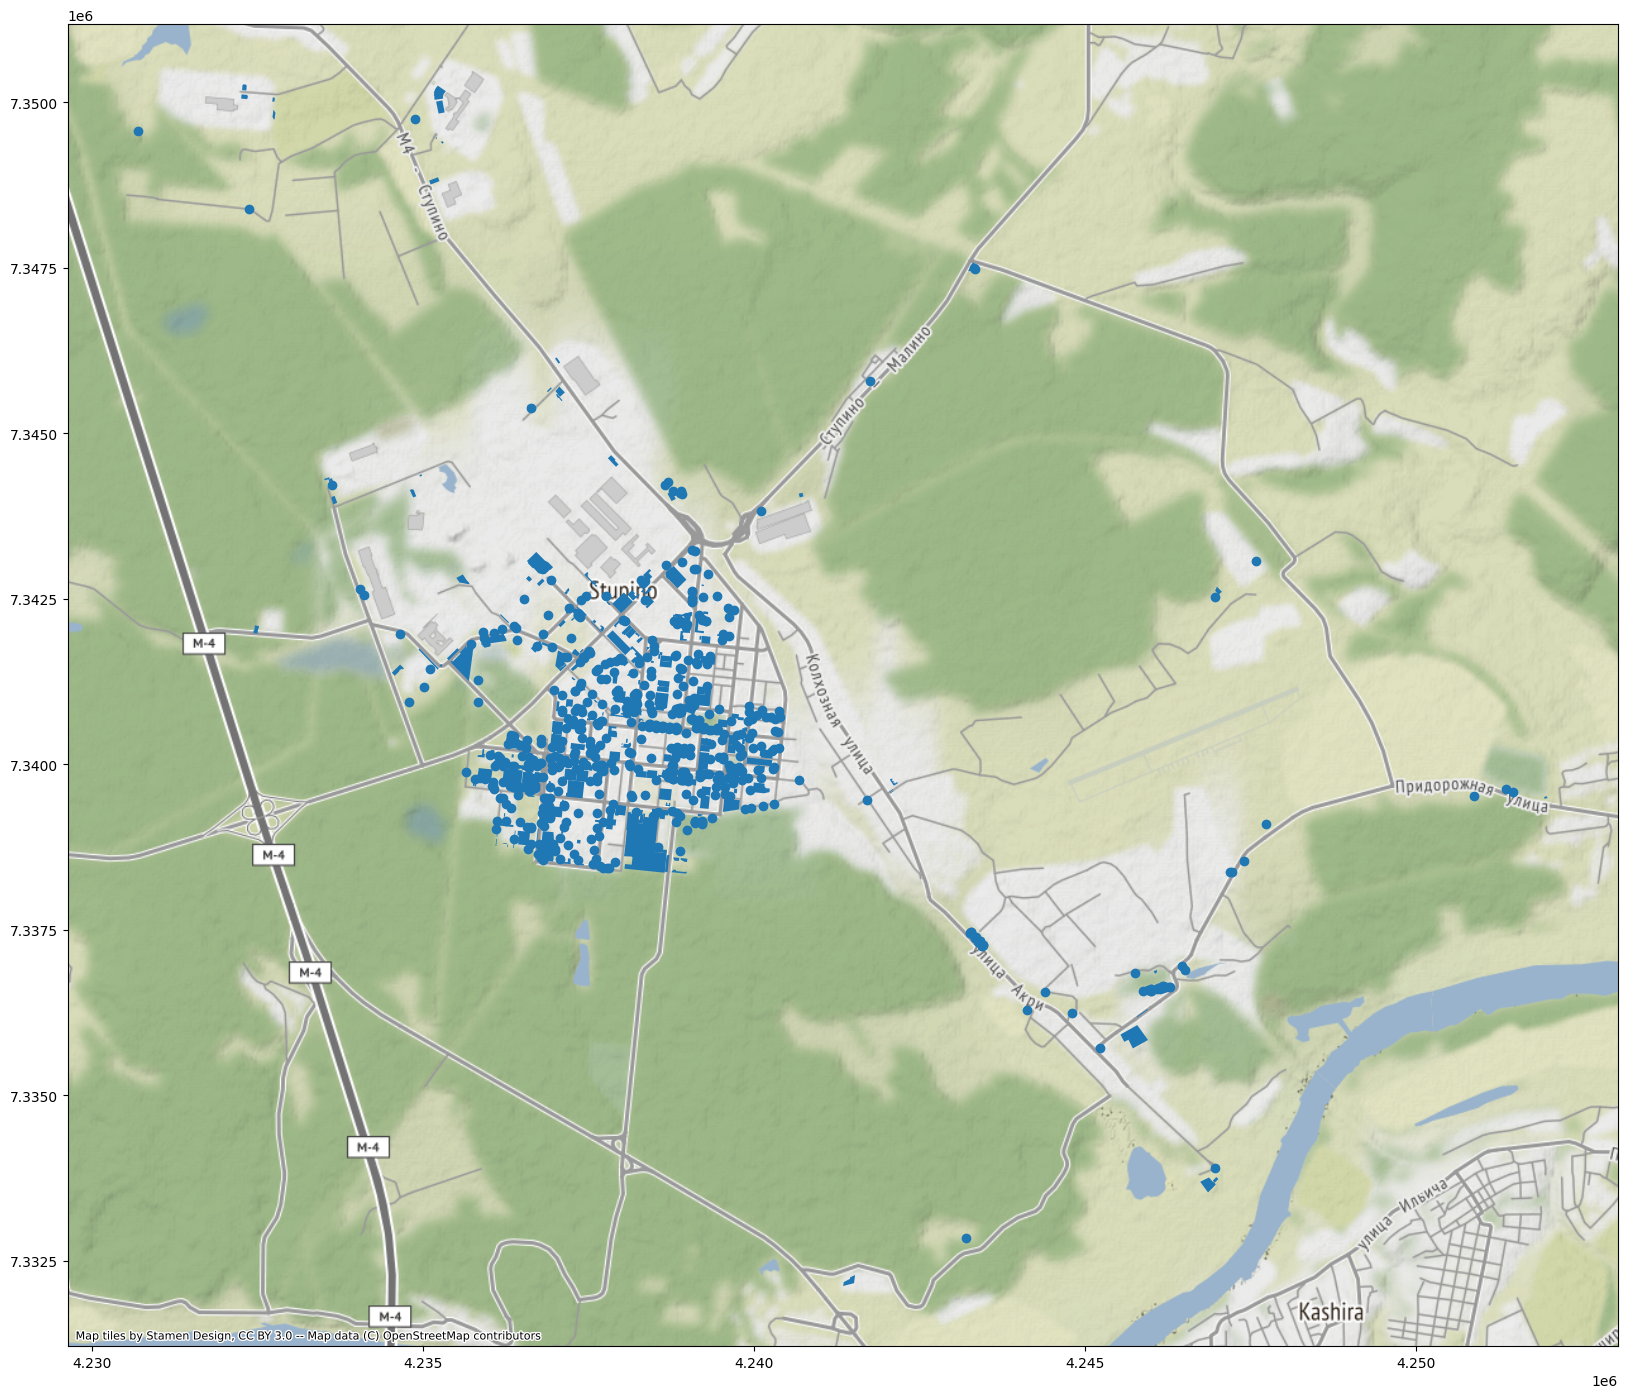

In [71]:
item_plot = df_wm.plot(figsize=(20,20), alpha = 1)
cx.add_basemap(item_plot)
# cx.add_basemap(item_plot, source=cx.providers.Stamen.TonerLite)
# cx.add_basemap(item_plot, source=cx.providers.Stamen.WaterColor)
# cx.add_basemap(item_plot, source=cx.providers.Stamen.TonerLabels)
